## Part 5 Comparing regressors
* https://github.com/dataprofessor/bioinformatics_freecodecamp/blob/main/CDD_ML_Part_5_Acetylcholinesterase_Compare_Regressors.ipynb
* https://youtu.be/jBlTQjcKuaY?t=4257

In [1]:
! pip install lazypredict --quiet

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [3]:
df = pd.read_csv('./data/06_bioactivity_data_3class_pubchem_fp.csv')

In [4]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

### Data pre-processing

In [5]:
X.shape

(118, 881)

In [6]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(118, 197)

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Compare ML algorithms

In [8]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:19<00:00,  2.16it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:17<00:00,  2.35it/s]


In [9]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,25347642064999155888557517014579731390042007156...,-2834575026623561407401921040492295971014011623...,4192062295205520992030202289217237034205184.00,0.12
KernelRidge,30.77,-32.29,4.54,0.02
QuantileRegressor,1.90,-0.01,0.79,0.31
LassoLars,1.89,0.00,0.79,0.03
DummyRegressor,1.89,0.00,0.79,0.02
ElasticNet,1.89,0.00,0.79,0.02
Lasso,1.89,0.00,0.79,0.03
LarsCV,1.76,0.15,0.72,0.44
OrthogonalMatchingPursuitCV,1.57,0.36,0.63,0.03


In [10]:

# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,42483102471082319590032533436736554213229795525...,-3213939056507966539693088870217573824749714660...,22990410431363096810474668739427162037982589843...,0.09
TransformedTargetRegressor,60027498939360271663104.00,-454121078932551577370624.00,864198954039.51,0.02
LinearRegression,60027498939360271663104.00,-454121078932551577370624.00,864198954039.51,0.02
KernelRidge,3.04,-14.40,5.03,0.02
GaussianProcessRegressor,2.23,-8.34,3.92,0.04
LassoLars,1.15,-0.14,1.37,0.02
DummyRegressor,1.15,-0.14,1.37,0.03
ElasticNet,1.15,-0.14,1.37,0.02
Lasso,1.15,-0.14,1.37,0.03


### Data visualization of model performance

(-1.0, 40.0)

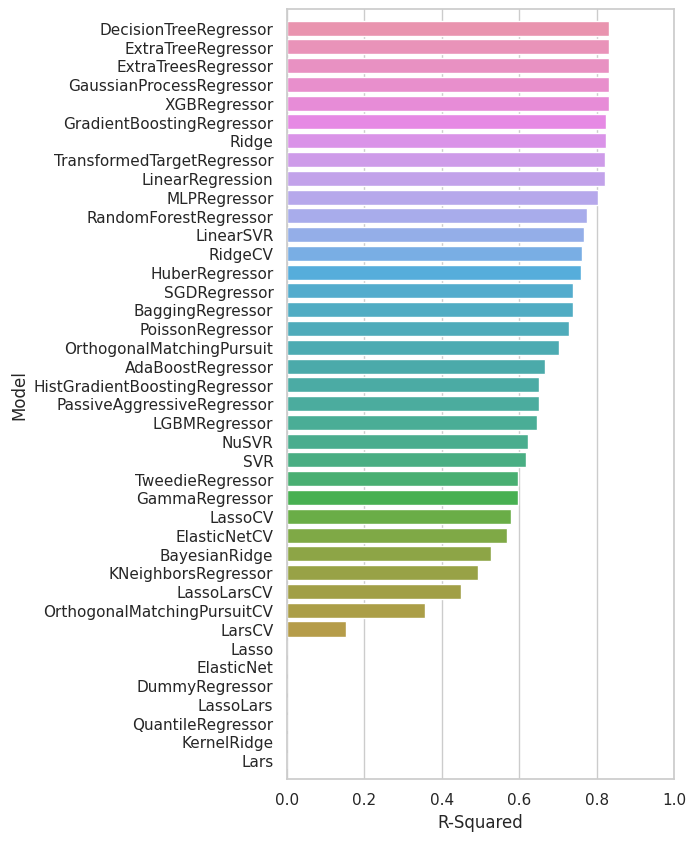

In [22]:

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))
plt.ylim(-1,len(predictions_train.index))
#plt.tight_layout()


(-1.0, 40.0)

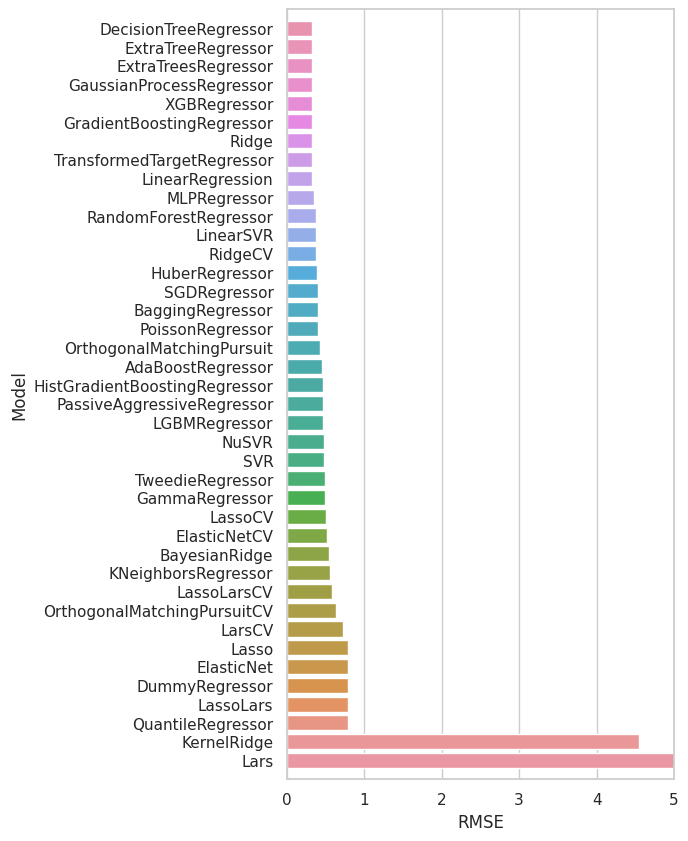

In [24]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 5))
plt.ylim(-1,len(predictions_train.index))

[(0.0, 10.0)]

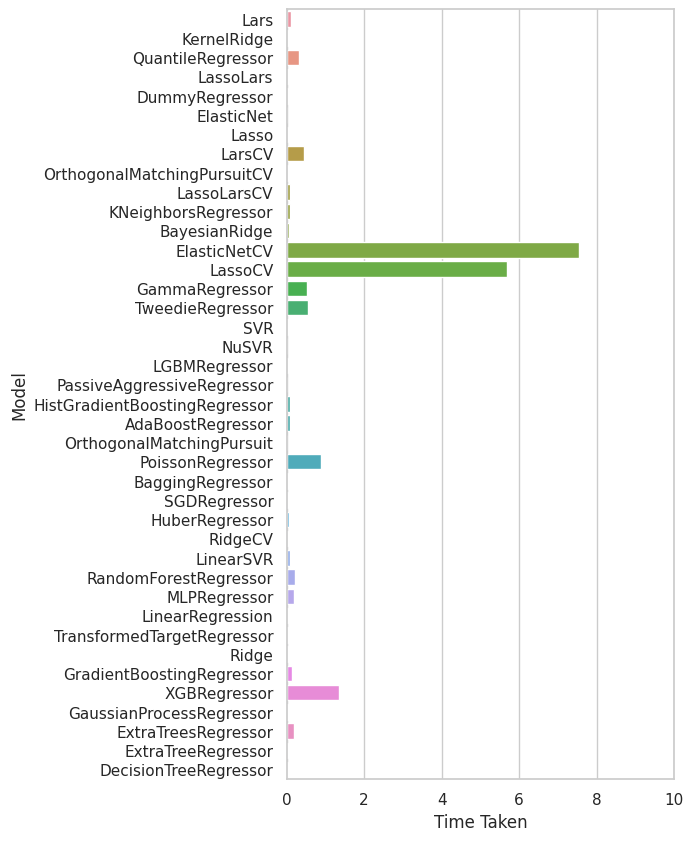

In [25]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))